# Stochastic Model: Results of different #agent values

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.loc[(results['d'] == 5) & (results['sigma'] == 1)]
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticAdditive5LackPlanner,50,5.0,2.0,5.0,1.0,172.800799,6.033328,7673.417064,38.6335
1,StochasticAdditive5LackPlanner,100,5.0,2.0,5.0,1.0,171.090335,29.689702,17932.195877,59.7600
2,StochasticAdditive5LackPlanner,200,5.0,2.0,5.0,1.0,140.000000,5.790841,38463.280000,72.3920
3,StochasticAdditive5LackPlanner,300,5.0,2.0,5.0,1.0,140.000000,11.316855,58835.320000,101.0730
4,StochasticAdditive5LackPlanner,400,5.0,2.0,5.0,1.0,140.000000,13.054559,80961.000000,117.0500


In [53]:
planners_names = ['StochasticIterativePlanner', 'StochasticStaticLackPlanner', 'StochasticAdditive5LackPlanner', 'StochasticMonotone15LackPlanner', 'StochasticMonotone20LackPlanner', 'StochasticMonotone30LackPlanner', 'StochasticMonotone45LackPlanner']

colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:cyan',  'tab:purple', 'tab:pink']

planners_results = [results.loc[results['planner'] == name] for name in planners_names]

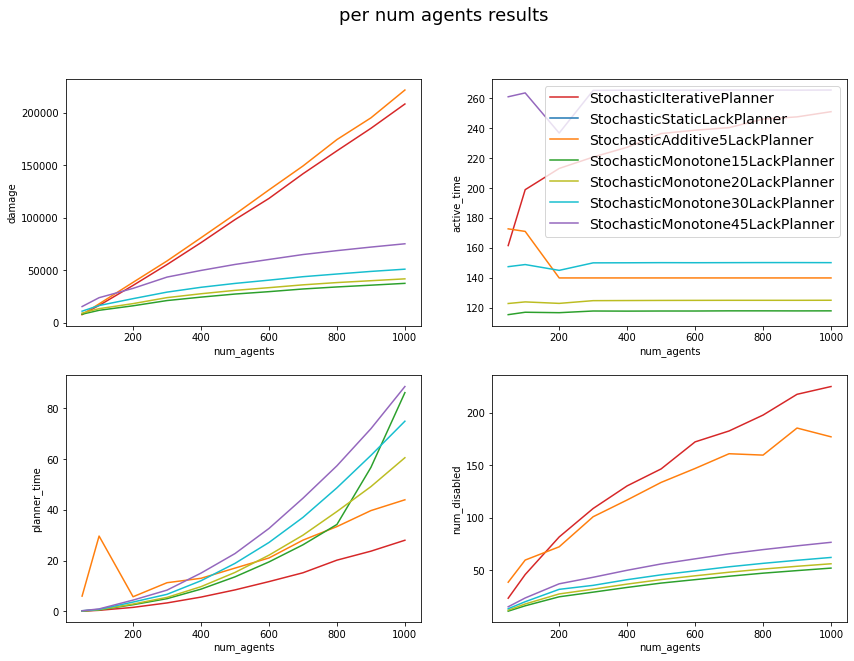

In [56]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

plt.figure(figsize=(14,10))
plt.suptitle('per num agents results', fontsize=18)

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.subplot(2, 2, i+1)
    plt.xlabel(x)
    plt.ylabel(y)
    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]), list(r[y]), c=colors[j])

    if i==1:
        plt.legend(planners_names, fontsize='14')

plt.savefig('./plots/stochastic_num_agents.png')
plt.show()

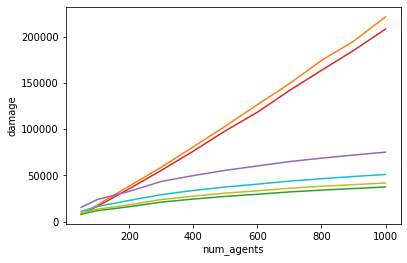

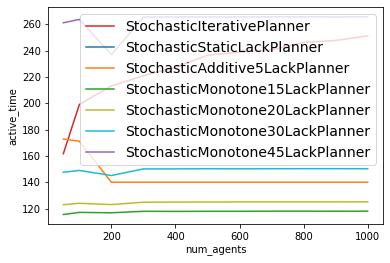

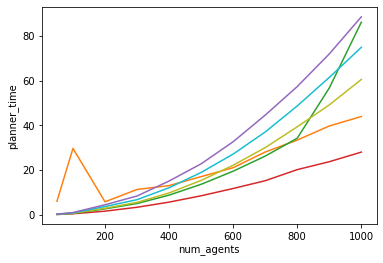

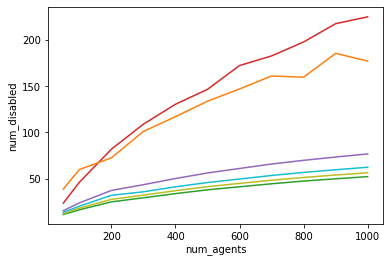

In [55]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 1:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()